<a href="https://colab.research.google.com/github/UjjwalMakhija/Salary_Prediction_Streamlit_ML/blob/main/Cat_dog_clssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import Sequential


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 210MB/s]
100% 1.06G/1.06G [00:07<00:00, 158MB/s]


In [ ]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)
validate_ds= tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:

#Noramlize
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validate_ds = validate_ds.map(process)

In [ ]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validate_ds)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.2619 - accuracy: 0.5758 - val_loss: 1.6807 - val_accuracy: 0.5844
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6116 - accuracy: 0.6751 - val_loss: 0.5623 - val_accuracy: 0.7228
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5198 - accuracy: 0.7416 - val_loss: 0.4929 - val_accuracy: 0.7640
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4592 - accuracy: 0.7858 - val_loss: 0.4939 - val_accuracy: 0.7644
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4057 - accuracy: 0.8189 - val_loss: 0.4121 - val_accuracy: 0.8106
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3514 - accuracy: 0.8498 - val_loss: 0.3925 - val_accuracy: 0.8318
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2737 - accuracy: 0.8851 - val_loss: 0.4515 - val_ac

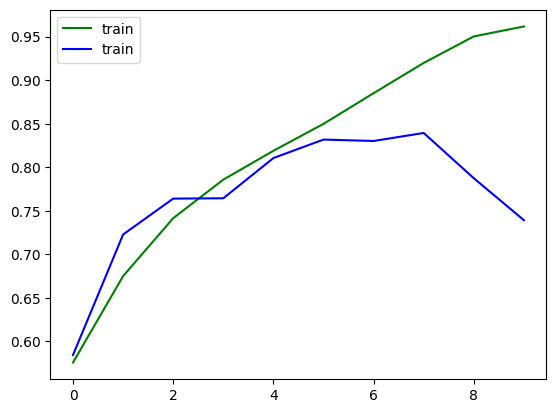

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='train')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

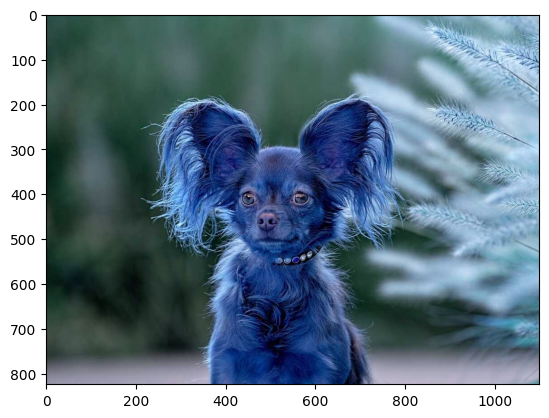

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(824, 1100, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 417ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img2 = cv2.imread('/content/cat2.jpg')

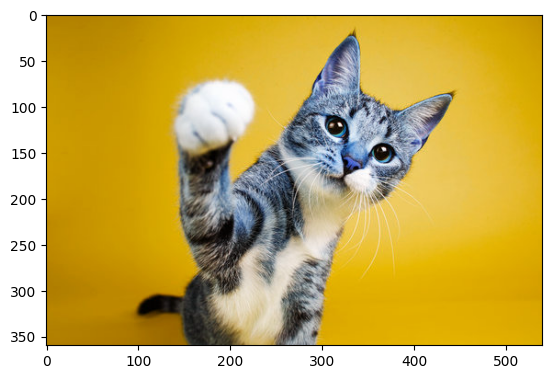

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
test_ip1 =test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_ip1)

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)